Sample Id: 41
SO4 (ml): 41
H2O (ml): 41
Anode Weight (g): 41
Volts: 41
Amps 0: 41
Amps 15: 41
Amps 30: 41
Amps 45: 41
Amps 60: 41
Reaction Time Duration (mins): 41
Copper Sulfate Yield: 41
Mean Squared Error: 2.18
R-squared: -0.42


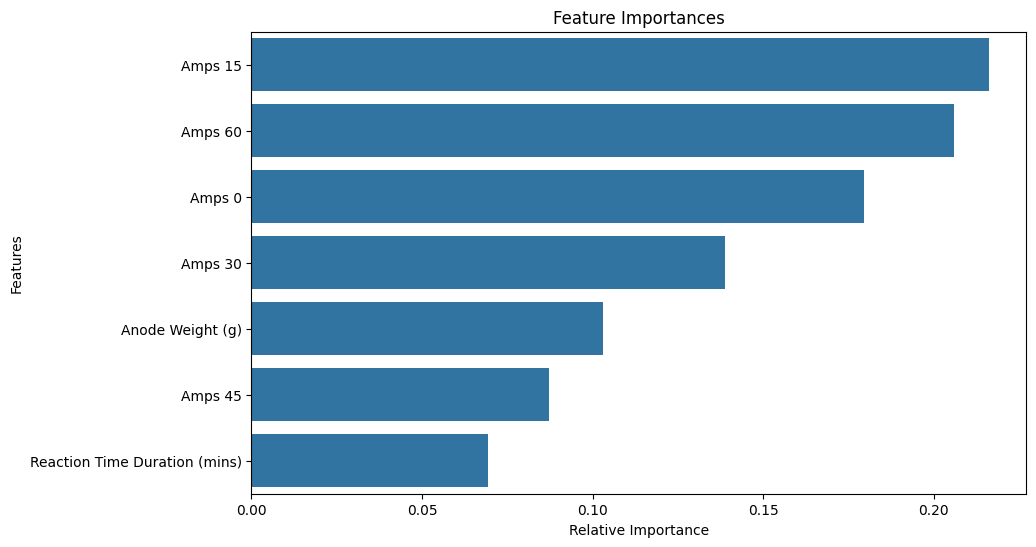

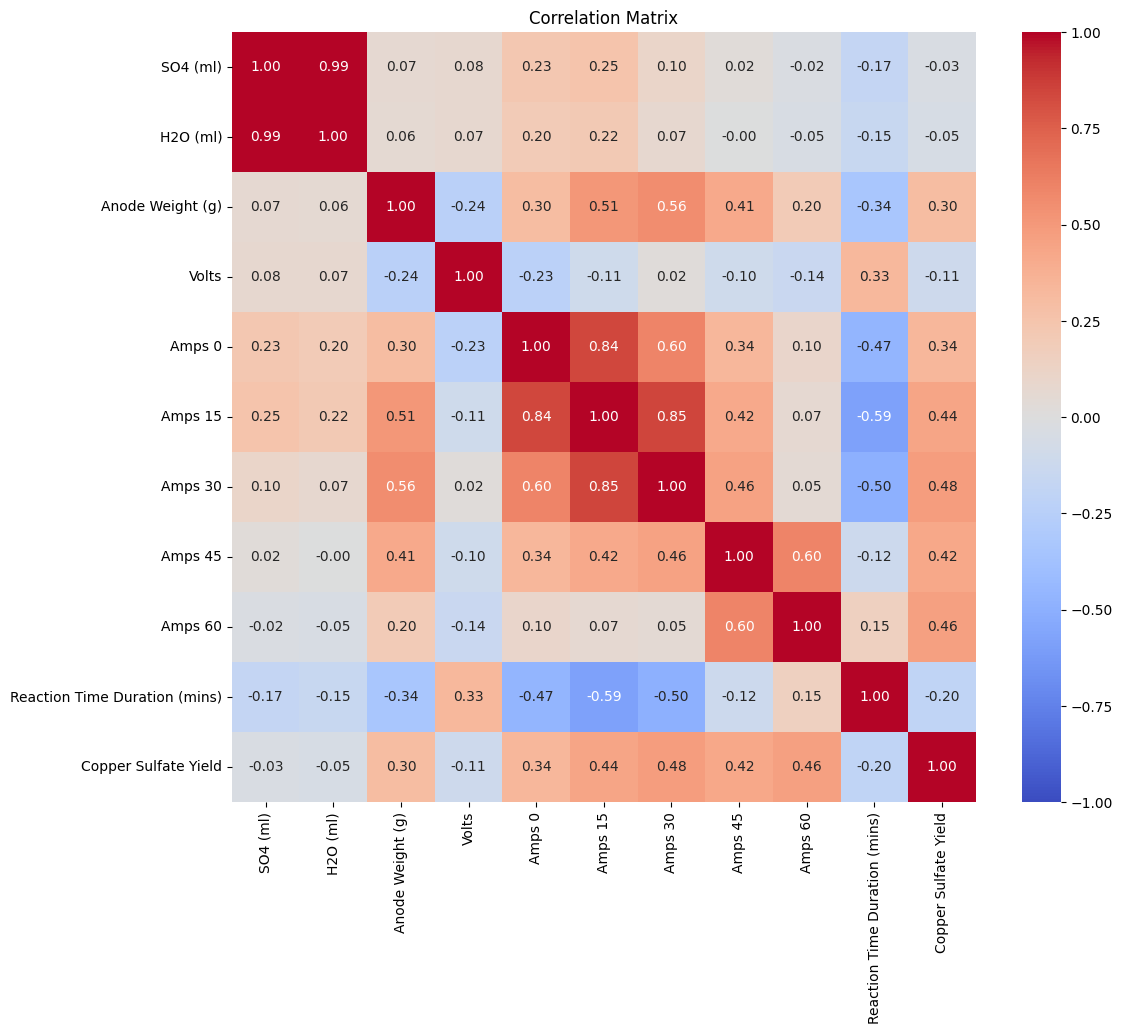

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Updated dataset
data = {
    "Sample Id": ["060724A", "060724B", "061024A", "061024B", "061124A", "061124B", "061224A", "061224B", "061224C", "061324A", "061324B", "061724A", "061724B", "061724C", "061724D", "061824A", "061824B", "061824C", "061824D", "061924A", "061924B", "061924C", "062124A", "062124B", "062124C", "062424A", "062424B", "062424C", "062424D", "062524A", "062524B", "062624A", "062624B", "062724A", "062724B", "062824A", "062824B", "070124A", "070124B", "070324A", "070324B"],
    "SO4 (ml)": [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 8],
    "H2O (ml)": [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 132, 16],
    "Anode Weight (g)": [4.701, 5.864, 1.224, 3.116, 5.513, 4.761, 1.784, 2.984, 3.956, 2.254, 2.1, 1.053, 3.388, 4.22, 5.17, 3.476, 2.482, 4.667, 5.89, 1.434, 2.413, 3.527, 5.2, 4.36, 2.597, 5.134, 4.088, 1.5, 2.75, 2.711, 2.674, 2.611, 2.586, 2.843, 2.581, 2.45, 2.534, 2.616, 2.51, 2.6, 2.686],
    "Volts": [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5],
    "Amps 0": [2.17, 1.67, 0.63, 1.4, 1, 1.55, 0.81, 0.7, 0.33, 2.2, 0.92, 1.29, 0.58, 0.78, 1.63, 0.8, 0.78, 1.2, 1.5, 1.03, 1.94, 0.48, 0.57, 2.33, 1.15, 1.03, 0.66, 0.8, 0.66, 0.84, 0.92, 0.76, 0.57, 0.58, 0.64, 0.96, 1.1, 0.62, 0.53, 0.16, 0.23],
    "Amps 15": [2.15, 1.73, 0.57, 0.8, 1.1, 1.71, 0.83, 0.87, 0.51, 1.43, 1.14, 0.72, 0.35, 0.8, 1.59, 0.81, 0.86, 1.37, 1.73, 0.6, 1.16, 0.15, 0.64, 1.97, 0.89, 1.16, 1.12, 0.9, 0.74, 1.13, 1.05, 0.75, 0.67, 0.82, 0.96, 1.3, 0.91, 0.71, 0.66, 0.17, 0.24],
    "Amps 30": [2.3, 2.1, 0.58, 0.55, 1.18, 0.81, 0.57, 0.85, 0.65, 1, 1.23, 0.59, 0.42, 0.88, 1.5, 0.91, 0.9, 1.4, 1.71, 0.47, 1.09, 0.14, 0.68, 1.47, 0.92, 1.26, 1.2, 0.5, 0.83, 1.42, 1.22, 0.92, 0.73, 1.02, 1.46, 0.95, 0.76, 0.78, 0.73, 0.2, 0.67],
    "Amps 45": [0, 2.76, 0.38, 0.94, 1.21, 1.27, 0.86, 0.87, 0.82, 0.74, 0.72, 0.66, 0.47, 0.8, 1.01, 1.21, 0.86, 1.31, 0.82, 0.33, 1.13, 0.14, 0.75, 1.42, 1, 1.38, 0.08, 0.47, 0.88, 1.58, 0.76, 1.04, 0.66, 0.44, 0.82, 0.91, 0.53, 0.82, 0.59, 0.22, 0.77],
    "Amps 60": [0, 2.1, 0.55, 1.37, 0.88, 1.58, 0.93, 1.1, 1.06, 1.05, 0.69, 0.44, 0.73, 0, 1.04, 1.55, 0.59, 1.21, 0.61, 0.64, 1.05, 1.21, 0.8, 0, 1.01, 0.41, 0.23, 0.38, 0.47, 1.31, 0.86, 0.57, 0.7, 0.63, 0.51, 0.82, 0.29, 0.7, 0.54, 0.25, 0.84],
    "Reaction Time Duration (mins)": [39, 65, 99, 99, 125, 125, 102, 102, 102, 99, 99, 131, 131, 131, 72, 132, 155, 79, 79, 149, 107, 154, 109, 61, 60, 65, 55, 67, 67, 151, 151, 158, 158, 115, 115, 82, 82, 103, 103, 142, 142],
    "Copper Sulfate Yield": [5.019, 7.161, 1.984, 3.941, 5.402, 3.911, 3.25, 4.649, 2.986, 4.559, 3.181, 1.613, 2.569, 1.045, 3.882, 5.327, 4.1, 3.433, 4.326, 1.993, 2.892, 0.204, 0, 0.519, 1.461, 2.703, 1.433, 1.704, 2.086, 2.11, 2.215, 3.147, 0.584, 3.665, 2.482, 3.349, 3.519, 1.258, 3.814, 1.504, 3.195]
}

# Print lengths of each array
for key, value in data.items():
    print(f"{key}: {len(value)}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df[["Anode Weight (g)", "Reaction Time Duration (mins)", "Amps 0", "Amps 15", "Amps 30", "Amps 45", "Amps 60"]]
y = df["Copper Sulfate Yield"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

# Correlation matrix (only for numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()